In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: /home/manousos/.cache/kagglehub/datasets/abhishek14398/salary-dataset-simple-linear-regression/versions/1


In [7]:
import os
files = os.listdir(path)
print("Files in folder:", files)

csv_file = [f for f in files if f.endswith(".csv")][0]  # Get the CSV file
csv_path = os.path.join(path, csv_file)


Files in folder: ['Salary_dataset.csv']


In [8]:
import pandas as pd
data = pd.read_csv(csv_path)
print(data.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [9]:
import matplotlib.pyplot as plt

def loss_function(m,b, data):
    total_loss = 0
    n = len(data)
    for i in range(n):
        x = data.iloc[i]['YearsExperience']
        y = data.iloc[i]['Salary']
        y_pred = m * x + b # Linear regression line prediction
        total_loss += (y - y_pred) ** 2 # squared error
    return total_loss / n # Mean Squared Error

def gradient_descent(data, learning_rate = 0.01, epochs = 1000):
    m = 0 # slope
    b = 0  # y-intercept
    n = len(data)
    losses = []
    
    for epoch in range(epochs+1):
        m_grad = 0
        b_grad = 0
        
        for i in range(n):
            x = data.iloc[i]['YearsExperience']
            y = data.iloc[i]['Salary']
            y_pred = m * x + b
            
            # Calculate gradients of loss function
            m_grad += (-2/n) * x * (y - y_pred) # calculating gradient w.r.t m
            b_grad += (-2/n) * (y - y_pred) # calculating gradient w.r.t b

        # Update parameters
        m -= learning_rate * m_grad # we subtract because we want to go in the direction of steepest descent
        b -= learning_rate * b_grad # gradient tells us if we increase the parameter a little how does the loss increase (or decrease)
        
        if epoch % 10 == 0:
            current_loss = loss_function(m, b, data)
            losses.append(current_loss)
            print(f"Epoch {epoch}: Loss = {current_loss}, m = {m}, b = {b}")

    plt.plot(range(0,len(losses)), losses, color='red')
    plt.xlabel('Epoch (×10)')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.show()

    return m, b


Epoch 0: Loss = 514619474.06140655, m = 9700.088266666668, b = 1520.08
Epoch 10: Loss = 132408045.78048415, m = 12671.395785648692, b = 2898.900825876828
Epoch 20: Loss = 124411281.82280165, m = 12541.418602250562, b = 3784.5175249968397
Epoch 30: Loss = 117046810.44190316, m = 12416.683691767177, b = 4634.400817568927
Epoch 40: Loss = 110264637.17677835, m = 12296.981619039138, b = 5449.992790195542
Epoch 50: Loss = 104018720.55641097, m = 12182.109317774903, b = 6232.677038288024
Epoch 60: Loss = 98266659.5424016, m = 12071.871915054888, b = 6983.781331577269
Epoch 70: Loss = 92969405.68521823, m = 11966.082400744548, b = 7704.579866583526
Epoch 80: Loss = 88090998.03983673, m = 11864.561310244599, b = 8396.295428202733
Epoch 90: Loss = 83598319.04121862, m = 11767.13642004174, b = 9060.101464076573
Epoch 100: Loss = 79460869.68236214, m = 11673.642455543357, b = 9697.124075265296
Epoch 110: Loss = 75650562.46870025, m = 11583.92081070061, b = 10308.443926600336
Epoch 120: Loss = 721

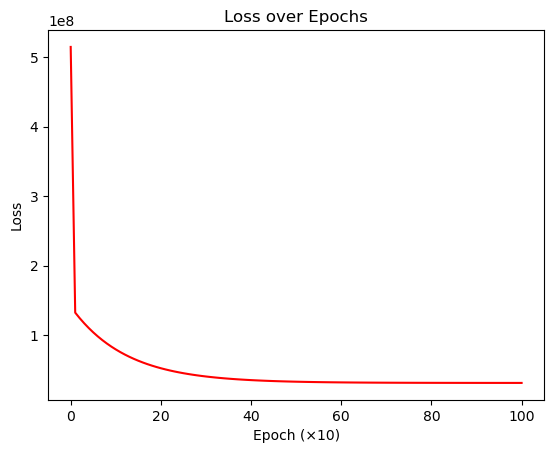

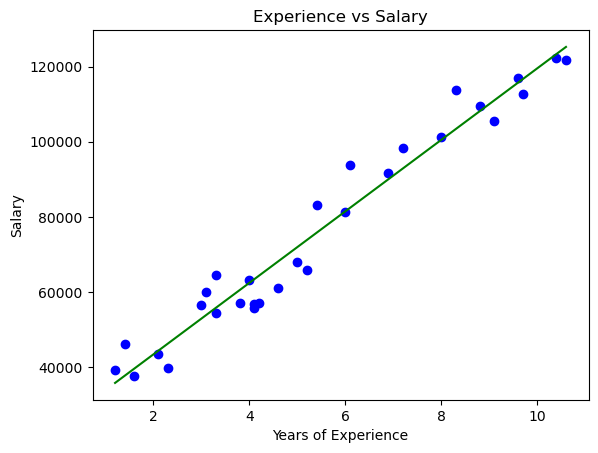

In [10]:
def linear_regression(data, learning_rate=0.01, epochs=1000):
    m,b = gradient_descent(data,learning_rate,epochs)
    plt.scatter(data['YearsExperience'], data['Salary'], color='blue')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.title('Experience vs Salary')

    x_vals = data['YearsExperience']
    y_vals = m * x_vals + b
    plt.plot(x_vals, y_vals, color='green')
    plt.show()

linear_regression(data, learning_rate=0.01, epochs=1000)